## Features Importance Implementation##

In this analysis, the stability selection which is a wrapper method is used to rank the features in terms of their power to predict the labels. In this method, the features ranking is implemented over several iterations and in each iteration a subset of randomly selected samples (observations) and features are used. In each iteration, we use a regularized Logistic Regression algorithm to train a classifier and then the features are ranked based on their weights (the higher the weight, the higher the rank is).

After completing all the iterations, the features are ranked based on the percentage of times that they are selected as the most important feature. This way, the features that are more frequently selected as the most important feature through iterations have scores close to 100% and the least important features have scores close to 0%. By randomly selecting features in each iteration, in some iterations, the strongest features will be absent and other strong features will have the chance to be selected as the strongest feature, so in the end all the features will be ranked properly according to the percentage of times they appear as the strongest feature.

The first advantage of this method is that the features rankings drop smoothly, and hence this ranking can be used for interpretation. Another advantage is that the result of this method is stable meaning that if we run this algorithm again, the result of the new implementation would be close to the results of the previous implementations, which also gives us the power to interpret the features importance.

## Stability Selection via Sckit-Learn

Here, the stability selection algortihm is implemented using RandomizedLogisticRegression class available in Scikit-Learn package, as follows:

In [1]:
from sklearn.linear_model import RandomizedLogisticRegression
import pandas as pd
import warnings

# to avoid deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# to read the csv data using pandas
task_data = pd.read_csv('task_data.csv')

# to prepare the X and Y(labels)
colNames = task_data.columns[task_data.columns.str.contains('sensor')]
X = task_data.loc[:, colNames]
Y = task_data.class_label

# to implement randomized logistic regression. Here, the sample_fraction 
# flag is set to 0.5, which defines the fraction of samples that is randomly 
# selected and used in each iteration of this algorithm.
randLog = RandomizedLogisticRegression(sample_fraction=0.5, random_state=20)
randLog.fit(X, Y)


RandomizedLogisticRegression(C=1, fit_intercept=True,
               memory=Memory(cachedir=None), n_jobs=1, n_resampling=200,
               normalize=True, pre_dispatch='3*n_jobs', random_state=20,
               sample_fraction=0.5, scaling=0.5, selection_threshold=0.25,
               tol=0.001, verbose=False)

## Ranked Features ##

In [9]:
# to print the result
print("Features sorted by their score:")
sortedFeatures = sorted(zip(randLog.scores_, colNames), reverse=True)
for i in range(len(sortedFeatures)):
    print('The score of {} is {:.2f}.'.format(sortedFeatures[i][1], 
                                              sortedFeatures[i][0]))


Features sorted by their score:
The score of sensor8 is 0.99.
The score of sensor4 is 0.85.
The score of sensor0 is 0.62.
The score of sensor3 is 0.49.
The score of sensor1 is 0.05.
The score of sensor7 is 0.02.
The score of sensor5 is 0.01.
The score of sensor9 is 0.00.
The score of sensor6 is 0.00.
The score of sensor2 is 0.00.


## Data Properties ##

To get a better understanding of the dataset, we can construct a scatter matrix of the ten features present in the data, which compares the pairs of features. The code block below produces a scatter matrix.

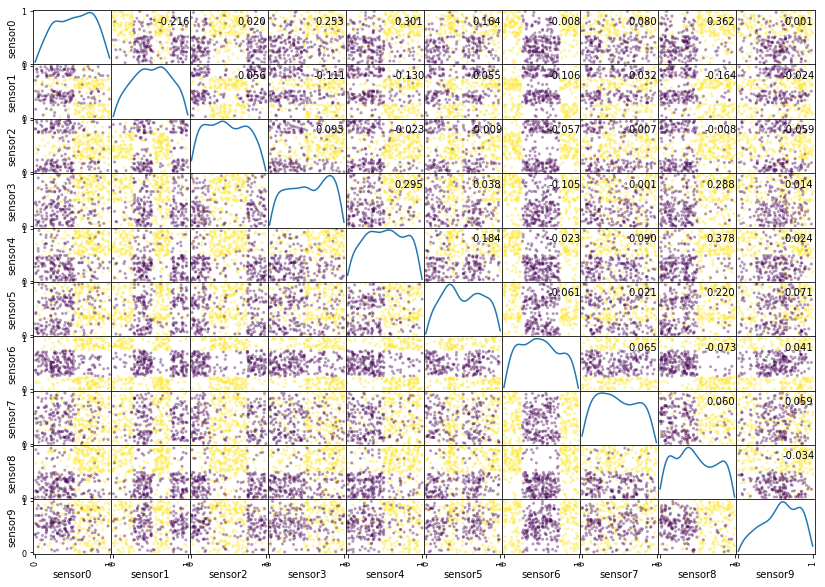

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Produce a scatter matrix for each pair of features in X
axes = pd.plotting.scatter_matrix(X, alpha = 0.4, figsize = (14,10), 
                                  diagonal = 'kde', c=Y);
corr = X.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', 
                        ha='center', va='center')
plt.show()

As obvious form the scatterplot matrix, the features with high rankings like sensor8 or sensor0 have one boundary that divide the data into two segments with different labels. However, the features with the least importance like sensor2 or sensor6 have two boundaries which divide the data into three segments with two labels. Because we are using logistic regression method for finding the features importance, the features that have only one boundary will have higher weights.